문제 정의 : KNeighborsClassifier 사용하여 타이나기 생존자(1), 사망(0) 예측
(머신러닝 책에 없는 예제)

기본 라이브러리 불러오기

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
#한글깨짐방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

#[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기

In [ ]:
# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic') #titanic은 sns에 내장되어 있는 데이터셋이다.

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df
# sibsp 은 배우자 또는 동승자 또는 자매
# parch는 부모
# fare는 배표가격 비쌀수록 1등석에 가깝겟지
# embarked 탑승지 (중간중간 들린 항구)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.info

<bound method DataFrame.info of      survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0           0       3    male  22.0  ...   NaN  Southampton     no  False
1           1       1  female  38.0  ...     C    Cherbourg    yes  False
2           1       3  female  26.0  ...   NaN  Southampton    yes   True
3           1       1  female  35.0  ...     C  Southampton    yes  False
4           0       3    male  35.0  ...   NaN  Southampton     no   True
..        ...     ...     ...   ...  ...   ...          ...    ...    ...
886         0       2    male  27.0  ...   NaN  Southampton     no   True
887         1       1  female  19.0  ...     B  Southampton    yes   True
888         0       3  female   NaN  ...   NaN  Southampton     no  False
889         1       1    male  26.0  ...     C    Cherbourg    yes   True
890         0       3    male  32.0  ...   NaN   Queenstown     no   True

[891 rows x 15 columns]>

In [ ]:
#데이터 자료형 확인
df.info() 
#데이터셋에서 전처리에서 중요한것은 object를 숫자형으로 바꾸는 것! sex성별이 남자,여자를 0,1로 바꿔줘야 한다.
#mlp도 마찬가지로 숫자로 바꾸면 좋다.

# 전처리를 좀 해보자 # NaN값이 많은 deck(객실 데크 위치) 열을 삭제, embarked와 내용이 겹치는 embark_town(승선 도시) 열을 삭제
# 11번 deck는 203건 밖에 없네? null값이 많구나. undersampling 하면 모두 203건으로 맞춘다는건데 굳이 그럴 필요 없자나? 그럼 오버샘플링하던가 아니면, 그냥 날려버려라
# 7번 엠바크는 S C 이런식으로 이니셜로되어 있는데, 12번 embark_town은 철자가 길자나. 그러니까 12번 날리고 7번만 살리자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


#[Step 2] 데이터 전처리

In [ ]:
# NaN값이 많은 deck(객실 데크 위치) 열을 삭제, embarked와 내용이 겹치는 embark_town(승선 도시) 열을 삭제

rdf = df.drop(['deck','embark_town'], axis=1)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.4+ KB


In [ ]:
#age는 714건이네? age는 학습할때 중요한정보기때문에, age가 null로 되어 있는 데이터는 날려버리자. = age 열에 나이 데이터가 없는 모든 행을 삭제 -> 177개 NaN 삭제
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    712 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


In [ ]:
# embarked 열의 NaN값(2건)을 승선도시 중에서 가장 많이 출현한 값 확인 -> 탑승한 도시의 첫글자
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
most_freq

'S'

In [ ]:
rdf.describe(include='all')
# 다시 한번 S가 제일 많은 embarked 인지 확인

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,712,714,714,714,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,no,True
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554,355,413,413,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# embarked 열의 NaN값(2건)을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
rdf['embarked'].fillna(most_freq, inplace=True)

In [ ]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    714 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


#[Step 3] 분석에 사용할 속성(열)을 선택


In [ ]:
# 분석에 활용할 열(속성)을 선택 (생존 여부, 객실 등급, 성별, 나이, 타이타닉에 탑승한 형제/자매 수, 타이타닉에 탑승한 부모/자녀 수, 탑승한 곳(항구) C=Cherbourg, Q=Queenstown, S=Southampton)

ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
ndf.info()
# 여기서 문제는 2번 sex가 object로 되어 있어서 컴퓨터가 알아들을수가 없다.
# 6번 embarked 는 C S Q도 마찬가지다.
# 원핫 인코딩해서 sex하고 embarked를 통해서 숫자 0,1 / 0,1,2 로 만들어 버리면 된다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   embarked  714 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


In [ ]:
#원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변경
# male, female -> [1,0], [0,1] 으로 만들어 버린다.
# embarked C, Q, S -> [1,0,0], [0,1,0], [0,0,1] 으로 만들어 버린다.

onehot_sex = pd.get_dummies(ndf['sex']) #get_dummies 라는 함수를 쓴다.
onehot_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [ ]:
ndf = pd.concat([ndf, onehot_sex], axis=1)
ndf

,survived,pclass,sex,age,sibsp,parch,embarked,female,male
0,0,3,male,22.0,1,0,S,0,1
1,1,1,female,38.0,1,0,C,1,0
2,1,3,female,26.0,0,0,S,1,0
3,1,1,female,35.0,1,0,S,1,0
4,0,3,male,35.0,0,0,S,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,1,0
886,0,2,male,27.0,0,0,S,0,1
887,1,1,female,19.0,0,0,S,1,0
889,1,1,male,26.0,0,0,C,0,1


In [ ]:
# embarked C, Q, S -> [1,0,0] , [0,1,0] , [0,0,1]

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked,female,male,town_C,town_Q,town_S
0,0,3,male,22.0,1,0,S,0,1,0,0,1
1,1,1,female,38.0,1,0,C,1,0,1,0,0
2,1,3,female,26.0,0,0,S,1,0,0,0,1
3,1,1,female,35.0,1,0,S,1,0,0,0,1
4,0,3,male,35.0,0,0,S,0,1,0,0,1


In [ ]:
#기존 컬럼 삭제
ndf.drop(['sex','embarked'], axis=1, inplace=True)
ndf.head()

# 왜 여자면 0 남자는 1 로 안하고 feature들을 따로 빼주는가?
# 왜냐면, 같은 컬럼안에 여자는0 남자는1 이면, 자료를 찾아내기 쉽지 않을 수 있다.

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


#[Step 4] 데이터셋 구분 - 훈련용(train data) / 검증용 (test data)

In [ ]:
# ndf -> X,y (문제집, 정답지)
X = ndf[['pclass','age',	'sibsp',	'parch',	'female',	'male',	'town_C',	'town_Q',	'town_S']] #독립변수
y = ndf['survived']

In [ ]:
# train 데이터와 test 데이터로 구분 ( 7:3 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) #y값은 생존값이다. survived
print(y_test.shape) #y값은 생존값이다. survived

(499, 9)
(215, 9)
(499,)
(215,)


#[Step 5] KNN 분류 모형 - sklearn 사용



In [ ]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (K=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# train 데이터를 사용하여 모형 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# test 데이터를 가지고 y_hat을 예측 (분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 1 0 1 1 0 0 0 0 0]
[0 1 0 1 0 0 1 0 0 0]


In [ ]:
from sklearn import metrics

#모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test,y_hat)
print("테스트 평가지표 n_neighbors=5")
print(knn_report)

테스트 평가지표 n_neighbors=5
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       126
           1       0.78      0.69      0.73        89

    accuracy                           0.79       215
   macro avg       0.79      0.78      0.78       215
weighted avg       0.79      0.79      0.79       215



In [ ]:
# sklearn을 이용하면 전부 계산해준다.
print('accuracy: ', metrics.accuracy_score(y_test,y_hat))
print('precision: ', metrics.precision_score(y_test,y_hat))
print('recall: ', metrics.recall_score(y_test,y_hat))
print('f1: ', metrics.f1_score(y_test,y_hat))
# precision보다 recall이 더 높게 나왔으면, 성능이 더 좋은 모델이다.
# 근데 보통은 recall이 precision보다 낮게 나온다.

accuracy:  0.7906976744186046
precision:  0.782051282051282
recall:  0.6853932584269663
f1:  0.7305389221556887


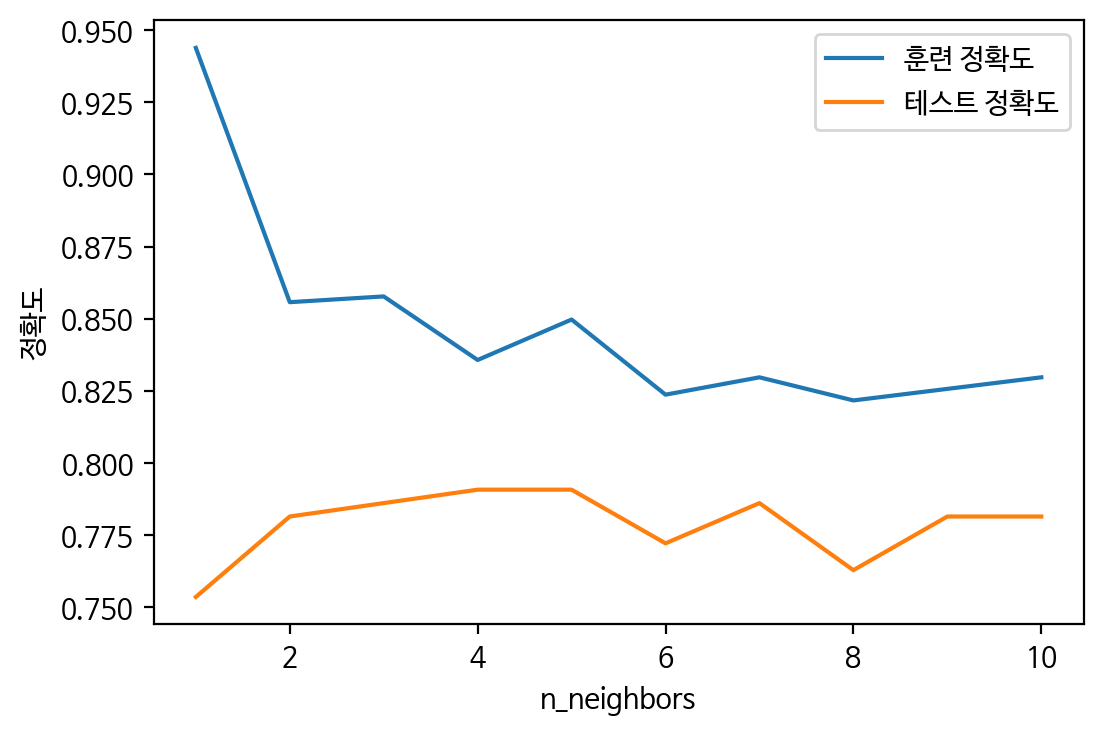

In [ ]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  
  #모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  #훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train,y_train))

  #테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test,y_test))

# 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic')

plt.plot(neighbors_settings,train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings,test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# n_neighbors = 5 일 때, 가장 최적점이고 너무 많이 해도 정확도는 떨어지게 되어 있다.

k-Neighbors Regression
* k=1 경우 그냥 가장 가까운 이웃의 타켓값
* k >=2 경우 회귀분석 -> 여러 개의 최근접 이웃 간의 평균(average or mean)이 예측 값


wave 데이터셋을 사용하여 이웃의 수(결정경계)에 따라 성능 평가

데이터 셋 분리하기(훈련셋, 테스트셋)

In [ ]:
pip install mglearn

In [ ]:
import mglearn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=7)

KNeighborsRegressor를 임포트하고 객체 생성


In [ ]:
# 이웃의 수는 3으로 하여 모델 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)

In [ ]:
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

성능평가 하기

In [ ]:
# score r-square 결정계수 0~1 사이 값을 갖고, 관계가 높을 수록 1에 가까운 값을 갖음
# 0에 가까울 수록 데이터 분포를 제대로 표현하지 못한 것
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test,y_test)))

테스트 세트 R^2: 0.49


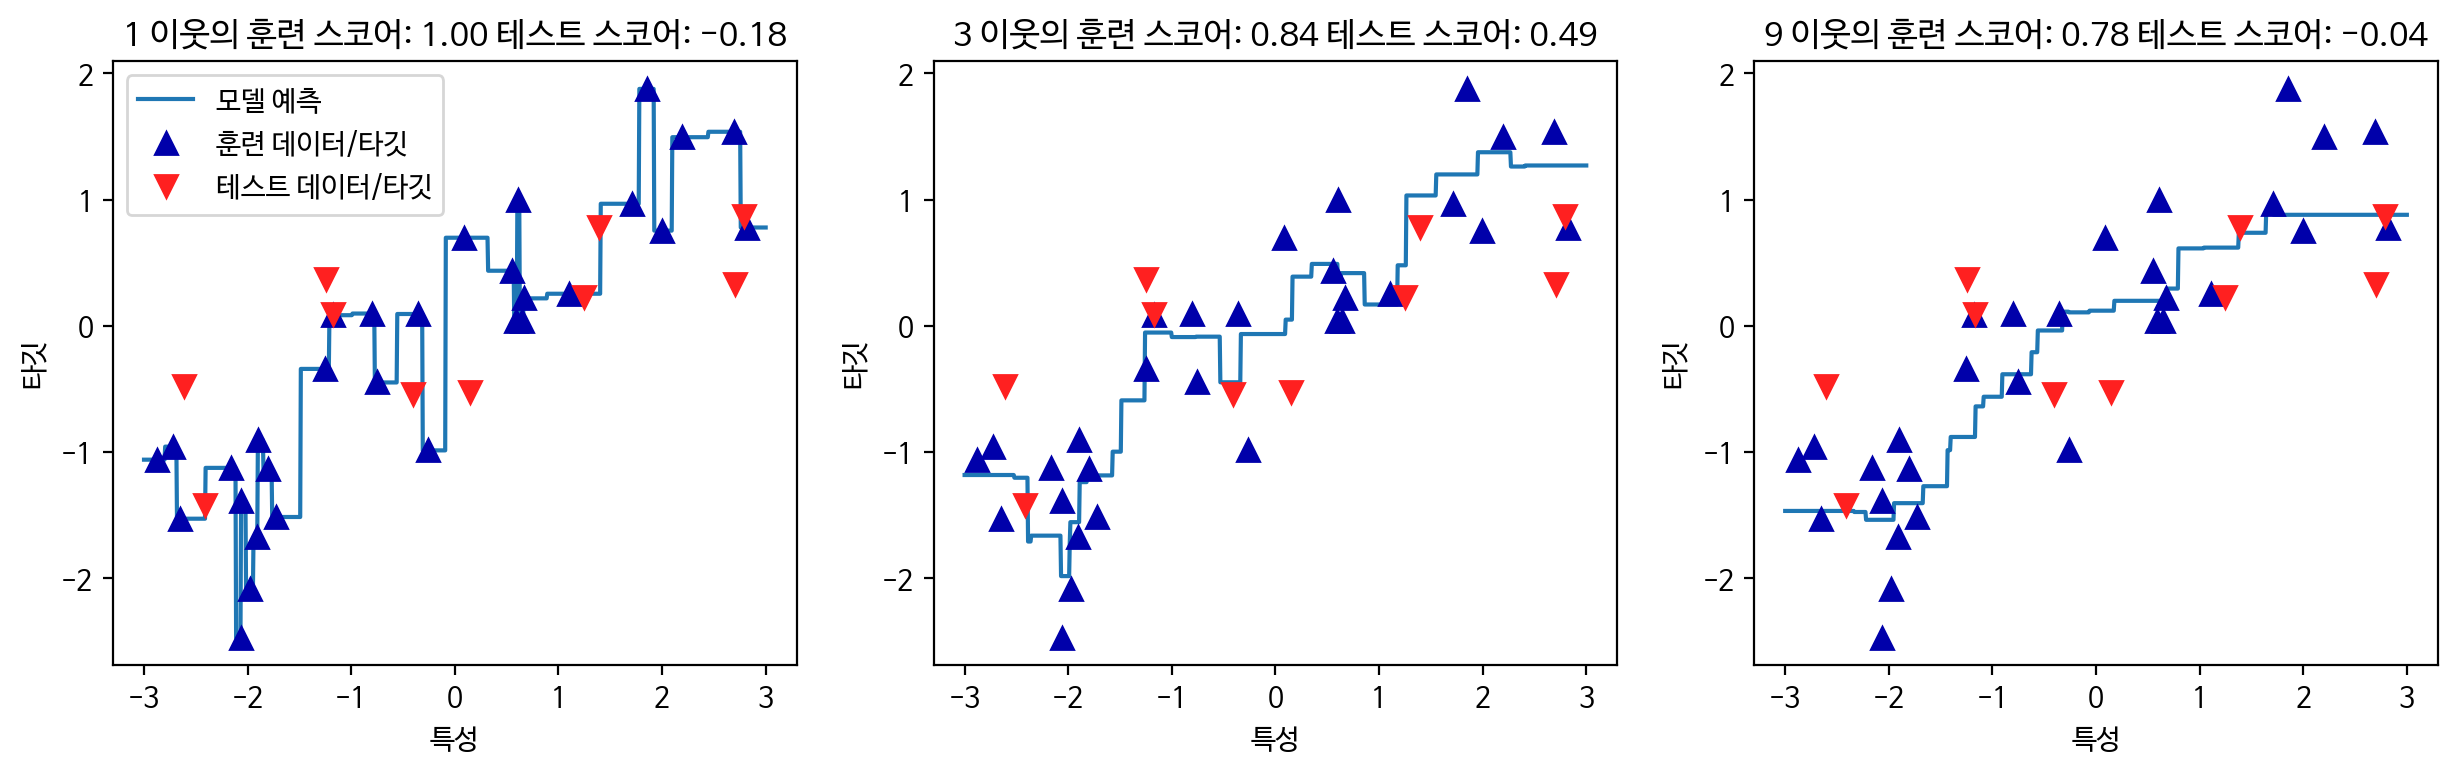

In [ ]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4),dpi = 100)
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()
